<a href="https://colab.research.google.com/github/manashpratim/Pneumonia-Classification/blob/master/Pneumonia_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Downloading the Dataset
!wget --no-check-certificate \
      "https://storage.googleapis.com/kaggle-datasets/17810/23812/chest_xray.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1561943058&Signature=D8AJwgMhL9QDnAaF42T10pu%2B28tZmkQ7Vugmi59eXQ41ziAhDLFMMGRq1xJM74s0tfh8IuryfB%2Boobq5tiW%2BUffe3zACOmyKrznD3ZDhKCTeCqhlIlK2mbQmvccveT8XzZf0q9siG7aPnh1VXzxcj3fJrps8XeYY3wcdFzLGjdhwZXlo1n8xrXMzkdXrSu%2FMcSlwCkM%2FZqGV2vjWw1umOeVoE5ouiRyw85%2BZcKcvTK2XKunbJDhagV6nktrp8pfpU6lrFz1bVzaZrismpBxLjRFF0I2nIP2iDYlxA1RgwV6Vb20sY4LSNGvTF%2B5xVPhwA8P8c88ZVP8siJ0IEOoEnA%3D%3D"\
       -O "/tmp/chest_xray.zip"

--2019-06-28 08:28:41--  https://storage.googleapis.com/kaggle-datasets/17810/23812/chest_xray.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1561943058&Signature=D8AJwgMhL9QDnAaF42T10pu%2B28tZmkQ7Vugmi59eXQ41ziAhDLFMMGRq1xJM74s0tfh8IuryfB%2Boobq5tiW%2BUffe3zACOmyKrznD3ZDhKCTeCqhlIlK2mbQmvccveT8XzZf0q9siG7aPnh1VXzxcj3fJrps8XeYY3wcdFzLGjdhwZXlo1n8xrXMzkdXrSu%2FMcSlwCkM%2FZqGV2vjWw1umOeVoE5ouiRyw85%2BZcKcvTK2XKunbJDhagV6nktrp8pfpU6lrFz1bVzaZrismpBxLjRFF0I2nIP2iDYlxA1RgwV6Vb20sY4LSNGvTF%2B5xVPhwA8P8c88ZVP8siJ0IEOoEnA%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 66.102.1.128, 2a00:1450:400c:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|66.102.1.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1237249419 (1.2G) [application/zip]
Saving to: ‘/tmp/chest_xray.zip’

/tmp/chest_xray.zip 100%[===================>]   1.15G   104MB/s    in 12s     

2019-06-28 08:28:53 (100 MB/s) - ‘/tmp/chest_xray

In [0]:
#Unzipping the dataser
import os
import zipfile

local_zip='/tmp/chest_xray.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/chest_xray')
zip_ref.close()

In [0]:
#Defining the directories
train_normal_dir=os.path.join('/tmp/chest_xray/chest_xray/train/NORMAL')
train_PNEUMONIA_dir=os.path.join('/tmp/chest_xray/chest_xray/train/PNEUMONIA')
test_normal_dir=os.path.join('/tmp/chest_xray/chest_xray/test/NORMAL')
test_PNEUMONIA_dir=os.path.join('/tmp/chest_xray/chest_xray/test/PNEUMONIA')
val_normal_dir=os.path.join('/tmp/chest_xray/chest_xray/val/NORMAL')
val_PNEUMONIA_dir=os.path.join('/tmp/chest_xray/chest_xray/val/PNEUMONIA')

In [4]:
#Total Number of Xrays
print('Total Training Normal Xrays: ',len(os.listdir(train_normal_dir)))
print('Total Training PNEUMONIA Xrays: ',len(os.listdir(train_PNEUMONIA_dir)))
print('Total Test Normal Xrays: ',len(os.listdir(test_normal_dir)))
print('Total Test PNEUMONIA Xrays: ',len(os.listdir(test_PNEUMONIA_dir)))
print('Total Validation Normal Xrays: ',len(os.listdir(val_normal_dir)))
print('Total Validation PNEUMONIA Xrays: ',len(os.listdir(val_PNEUMONIA_dir)))

Total Training Normal Xrays:  1342
Total Training PNEUMONIA Xrays:  3876
Total Test Normal Xrays:  234
Total Test PNEUMONIA Xrays:  390
Total Validation Normal Xrays:  9
Total Validation PNEUMONIA Xrays:  9


## **Clearly this is an unbalanced Dataset**

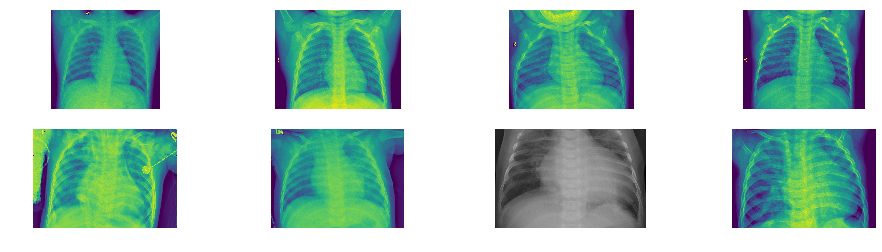

In [5]:
#Displaying the Xray Images
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#We'll output images in a 4X2 configuration. The 1st row corresponds to normal chest Xrays. 2nd row corresponds to PNEUMONIA Xrays. 

nrows=2
ncols=4

pic_index=0

fig=plt.gcf()
fig.set_size_inches(ncols*4,nrows*2)

pic_index+=4

next_normal_pix = [os.path.join(train_normal_dir,fname) for fname in os.listdir(train_normal_dir)[pic_index-4:pic_index]]
next_pne_pix = [os.path.join(train_PNEUMONIA_dir,fname) for fname in os.listdir(train_PNEUMONIA_dir)[pic_index-4:pic_index]]

for i, img_path in enumerate(next_normal_pix+next_pne_pix):
  sp=plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')
  img=mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

In [0]:
import tensorflow as tf
from tensorflow import keras

In [7]:
#Image Generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
                                   #,horizontal_flip=True)

train_generator=train_datagen.flow_from_directory(
      '/tmp/chest_xray/chest_xray/train/',
      target_size=(224,224),
      batch_size=32,
      class_mode='binary'
)

test_datagen=ImageDataGenerator(rescale=1./255)
test_generator=train_datagen.flow_from_directory(
      '/tmp/chest_xray/chest_xray/test/',
      target_size=(224,224),
      batch_size=8,
      class_mode='binary',
      shuffle=False
)

val_datagen=ImageDataGenerator(rescale=1./255)
val_generator=train_datagen.flow_from_directory(
      '/tmp/chest_xray/chest_xray/val/',
      target_size=(224,224),
      batch_size=4,
      class_mode='binary'
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


# **Convolutional Neural Network**

In [0]:
#Building the model
import numpy as np

model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(16,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
   
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [93]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_400 (Conv2D)          (None, 222, 222, 16)      448       
_________________________________________________________________
conv2d_401 (Conv2D)          (None, 220, 220, 16)      2320      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 110, 110, 16)      0         
_________________________________________________________________
conv2d_402 (Conv2D)          (None, 108, 108, 32)      4640      
_________________________________________________________________
conv2d_403 (Conv2D)          (None, 106, 106, 32)      9248      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 53, 53, 32)        0         
_________________________________________________________________
conv2d_404 (Conv2D)          (None, 51, 51, 64)       

In [94]:
#optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.1, amsgrad=False)
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit_generator(
  train_generator,
  steps_per_epoch=163,
  epochs=5,
  validation_data=val_generator,
  validation_steps=4,
  verbose=1
)

Epoch 1/5
163/163 [==============================] - 301s 2s/step - loss: 0.4860 - acc: 0.7794 - val_loss: 0.3025 - val_acc: 0.9375
Epoch 2/5
163/163 [==============================] - 269s 2s/step - loss: 0.0972 - acc: 0.9638 - val_loss: 0.4143 - val_acc: 0.7500
Epoch 3/5
163/163 [==============================] - 282s 2s/step - loss: 0.0485 - acc: 0.9822 - val_loss: 0.0094 - val_acc: 1.0000
Epoch 4/5
163/163 [==============================] - 281s 2s/step - loss: 0.0248 - acc: 0.9907 - val_loss: 0.4351 - val_acc: 0.7500
Epoch 5/5
163/163 [==============================] - 280s 2s/step - loss: 0.0139 - acc: 0.9947 - val_loss: 0.5483 - val_acc: 0.7500


In [96]:
print(model.metrics_names)
print(model.evaluate_generator(test_generator,  verbose=1))

['loss', 'acc']
8/8 [==============================] - 6s 719ms/step - loss: 2.5159 - acc: 0.7644
[2.5158590815325397, 0.7644231]


In [97]:
y_true = test_generator.classes
y_test_probabilities = model.predict_generator(test_generator,  verbose=1)
y_pred=np.rint(y_test_probabilities )

8/8 [==============================] - 15s 2s/step


In [99]:
from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.38      0.55       234
           1       0.73      0.99      0.84       390

    accuracy                           0.76       624
   macro avg       0.85      0.69      0.69       624
weighted avg       0.82      0.76      0.73       624



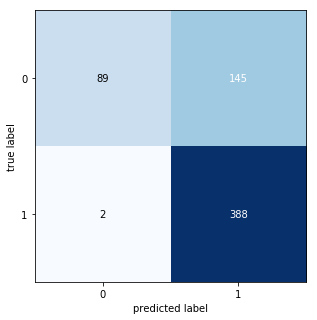

In [100]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_true, y_pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

### **Here,  "Recall" is the most significant metric even more than accuracy and precision. False negative has to be minimized because falsely diagnosing a patient of pneumonia as not having pneumonia is a much larger concern than falsely diagnosing a healthy person as a pneumonia patient. By minimizing false negative, which is in the denominator, we can increase 'Recall' .This model achieves a Recall of 99%.**

##**Now let's train the dataset with DenseNet121. I will use the CheXNet weights. We will see how our model fares with a model trained using transfer learning on Chest XRays**

# **Dense Neural Network (DenseNet)**

In [8]:
!wget --no-check-certificate \
        "https://storage.googleapis.com/kaggle-datasets/66426/130851/brucechou1983_CheXNet_Keras_0.3.0_weights.h5.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1561942557&Signature=LgBs0ZzvkJ2Re%2BSuUX1JSq4%2B8DhKC1Ur4evO5L%2F4ArqEzSE2BuRj%2BrfNBOMKedVevNZNr2tuljEzE7frleWdq2yRuim2eRygRcAlpauT1wsfOc9i%2BqE%2BiFLDM03CJWV14cURqf%2FS6h64yCNvTqB%2BywEs2rjKEmZykp%2FWhHVEurINTQp1%2FntTO2rK%2BQMawClqAvo2SVayh4CVNnzzDKeyxm9R0w51FoIL%2BoYQhCVnMJLKk3KeOG8lcreKED5vR7D62KrnJy4ft1Hz2%2BO2pkP0OdDP0QZ4D%2F66bdaN6xi3OJg1g9OizWpkzct3OnLBVuivd344CUKlr25KhRS85JuZ2A%3D%3D"\
        -O "/tmp/CheXNet_Keras_0.3.0_weights.h5.zip"

local_zip='/tmp/CheXNet_Keras_0.3.0_weights.h5.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/CheXNet_Keras_0.3.0_weights.h5')
zip_ref.close()

--2019-06-28 08:29:20--  https://storage.googleapis.com/kaggle-datasets/66426/130851/brucechou1983_CheXNet_Keras_0.3.0_weights.h5.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1561942557&Signature=LgBs0ZzvkJ2Re%2BSuUX1JSq4%2B8DhKC1Ur4evO5L%2F4ArqEzSE2BuRj%2BrfNBOMKedVevNZNr2tuljEzE7frleWdq2yRuim2eRygRcAlpauT1wsfOc9i%2BqE%2BiFLDM03CJWV14cURqf%2FS6h64yCNvTqB%2BywEs2rjKEmZykp%2FWhHVEurINTQp1%2FntTO2rK%2BQMawClqAvo2SVayh4CVNnzzDKeyxm9R0w51FoIL%2BoYQhCVnMJLKk3KeOG8lcreKED5vR7D62KrnJy4ft1Hz2%2BO2pkP0OdDP0QZ4D%2F66bdaN6xi3OJg1g9OizWpkzct3OnLBVuivd344CUKlr25KhRS85JuZ2A%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.76.128, 2a00:1450:400c:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.76.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26591250 (25M) [application/zip]
Saving to: ‘/tmp/CheXNet_Keras_0.3.0_weights.h5.zip’

/tmp/CheXNet_Keras_ 100%[===================>]  25.36M  41.6

In [9]:
local_weights_file = '/tmp/CheXNet_Keras_0.3.0_weights.h5/brucechou1983_CheXNet_Keras_0.3.0_weights.h5'

from keras.layers import *
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense
import numpy as np 
from keras.applications.densenet import DenseNet121

base_model1=DenseNet121(include_top=False, weights= None,  input_shape=(224,224,3), pooling='avg')
base_model1.trainable = False
base_model1.load_weights(local_weights_file, by_name=True)


#x = Dense(128, activation='relu')(base_model1.output)
x = Dense(1, activation='sigmoid')(base_model1.output)
transfer_model = Model(base_model1.input, x) 
transfer_model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])



Using TensorFlow backend.
W0628 08:29:33.273372 139768828925824 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0628 08:29:33.319128 139768828925824 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0628 08:29:33.331006 139768828925824 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0628 08:29:33.372131 139768828925824 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0628 

In [10]:
history1 = transfer_model.fit_generator(
            train_generator,
            validation_data = test_generator,
            steps_per_epoch = 163,
            epochs = 5,
            validation_steps = 4,
            verbose = 1)

Epoch 1/5
163/163 [==============================] - 174s 1s/step - loss: 0.1390 - acc: 0.9398 - val_loss: 1.9779 - val_acc: 0.2812
Epoch 2/5
163/163 [==============================] - 140s 860ms/step - loss: 0.0359 - acc: 0.9866 - val_loss: 0.0566 - val_acc: 0.9688
Epoch 3/5
163/163 [==============================] - 140s 860ms/step - loss: 0.0209 - acc: 0.9929 - val_loss: 0.3250 - val_acc: 0.9062
Epoch 4/5
163/163 [==============================] - 140s 859ms/step - loss: 0.0148 - acc: 0.9954 - val_loss: 8.4004 - val_acc: 0.0312
Epoch 5/5
163/163 [==============================] - 140s 861ms/step - loss: 0.0063 - acc: 0.9981 - val_loss: 1.4595 - val_acc: 0.6875


In [15]:
print(transfer_model.metrics_names)
print(transfer_model.evaluate_generator(test_generator,steps=78,  verbose=1))

['loss', 'acc']
78/78 [==============================] - 10s 124ms/step
[0.34069742610186854, 0.9006410256410257]
['loss', 'acc']
78/78 [==============================] - 10s 122ms/step
[0.34069742610186854, 0.9006410256410257]


In [12]:
y_true = test_generator.classes
y_test_probabilities1 = transfer_model.predict_generator(test_generator,  steps=78,verbose=1)
y_pred1=np.rint(y_test_probabilities1 )

78/78 [==============================] - 12s 155ms/step


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred1))

              precision    recall  f1-score   support

           0       0.07      0.07      0.07       234
           1       0.44      0.43      0.43       390

    accuracy                           0.29       624
   macro avg       0.25      0.25      0.25       624
weighted avg       0.30      0.29      0.30       624



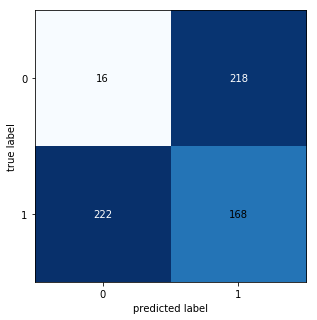

In [16]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_true, y_pred1)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

## **We can see that the recall of this model is only 43%. It is evident that my CNN model convincingly beats the DenseNet model trained with CheXnet weights.**